In [5]:

import pandas as pd


train = pd.read_csv('train.csv')

print train.describe()

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


In [6]:
print train.head()

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [7]:
"""Resolution and Descript are  only in train, so it's not going to be worth looking into"""

"Resolution and Descript are  only in train, so it's not going to be worth looking into"

In [8]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
""" Based on my educated guess right now, time of day and location would be my first guess at predictive variables for category. PdDistrict is probably just dependant on Address and/or X Y coords. I want to look at how these three interact"""

' Based on my educated guess right now, time of day and location would be my first guess at predictive variables for category. PdDistrict is probably just dependant on Address and/or X Y coords. I want to look at how these three interact'

In [10]:
"""Looking at which days of the week correspond best with crime. It'd be nice if I could clean Dates for time only, because then I could look at each time of day at each day of the week"""

"Looking at which days of the week correspond best with crime. It'd be nice if I could clean Dates for time only, because then I could look at each time of day at each day of the week"

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                     

/home/mackenzie/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


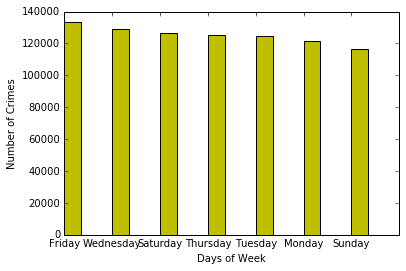

In [11]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
print train.DayOfWeek.value_counts()
print train.Category.value_counts()

#make a plot for DayOfWeek counts 

fig, ax = plt.subplots()
weekRects = ax.bar(np.arange(7), train.DayOfWeek.value_counts(), 0.35, color ='y')
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Days of Week')
ax.set_xticks(np.arange(7), 0.55)
ax.set_xticklabels(('Friday','Wednesday','Saturday','Thursday','Tuesday','Monday', 'Sunday'))

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Fridays = train[train.DayOfWeek == 'Friday']
Wednesdays = train[train.DayOfWeek == 'Wednesday']
Thursdays = train[train.DayOfWeek == 'Thursday']
Tuesdays = train[train.DayOfWeek == 'Tuesday']
Mondays = train[train.DayOfWeek == 'Monday']
Saturdays =train[train.DayOfWeek == 'Saturday']
Sundays = train[train.DayOfWeek == 'Sunday']



friCounts= Fridays.Category.value_counts().head()
wedCounts = Wednesdays. Category.value_counts().head()
thuCounts =Thursdays.Category.value_counts().head()
tueCounts =Tuesdays.Category.value_counts().head()
monCounts = Mondays.Category.value_counts().head()
satCounts = Saturdays.Category.value_counts().head()
sunCounts = Sundays.Category.value_counts().head()
#Can also use sort_index() to look at each specific crime across the days

print sunCounts

print monCounts

print tueCounts

print wedCounts

print thuCounts

print friCounts

print satCounts
#I want to get a comparitive bar graph going at some point. If we're trying to preduct category, I'll want to look at what categories are most popular in a given day

'''
N = 39 #39 different categories 
ind = np.arange(N)
width = 0.3

fig,ax = plt.subplots()
friRects = ax.bar(ind,friCounts,width, color = 'r')
wedRects =ax.bar(ind, wedCounts, width, color ='y')
thuRects = ax.bar(ind, thuCounts, width, color ='g')
tueRects = ax.bar(ind, tuecounts, width, color ='b')
monRects = ax.bar(ind, monCounts, width, color ='c')
satRects = ax.bar(ind, satCounts, width, color ='k')
sunRects = ax.bar(ind, sunCounts, width, color = 'm')
'''

LARCENY/THEFT     24150
OTHER OFFENSES    15457
NON-CRIMINAL      12973
ASSAULT           12082
VEHICLE THEFT      7504
Name: Category, dtype: int64
LARCENY/THEFT     23570
OTHER OFFENSES    17787
NON-CRIMINAL      12855
ASSAULT           10560
DRUG/NARCOTIC      7823
Name: Category, dtype: int64
LARCENY/THEFT     23957
OTHER OFFENSES    18809
NON-CRIMINAL      12738
ASSAULT           10280
DRUG/NARCOTIC      8474
Name: Category, dtype: int64
LARCENY/THEFT     24487
OTHER OFFENSES    19950
NON-CRIMINAL      12928
ASSAULT           10553
DRUG/NARCOTIC      9267
Name: Category, dtype: int64
LARCENY/THEFT     24415
OTHER OFFENSES    18462
NON-CRIMINAL      12819
ASSAULT           10246
DRUG/NARCOTIC      8454
Name: Category, dtype: int64
LARCENY/THEFT     27104
OTHER OFFENSES    18588
NON-CRIMINAL      13984
ASSAULT           11160
VEHICLE THEFT      8613
Name: Category, dtype: int64
LARCENY/THEFT     27217
OTHER OFFENSES    17129
NON-CRIMINAL      14007
ASSAULT           11995
VEHICLE TH

"\nN = 39 #39 different categories \nind = np.arange(N)\nwidth = 0.3\n\nfig,ax = plt.subplots()\nfriRects = ax.bar(ind,friCounts,width, color = 'r')\nwedRects =ax.bar(ind, wedCounts, width, color ='y')\nthuRects = ax.bar(ind, thuCounts, width, color ='g')\ntueRects = ax.bar(ind, tuecounts, width, color ='b')\nmonRects = ax.bar(ind, monCounts, width, color ='c')\nsatRects = ax.bar(ind, satCounts, width, color ='k')\nsunRects = ax.bar(ind, sunCounts, width, color = 'm')\n"

In [13]:
"""Looks likes Larceny/Theft, other offenses, non-criminal, assault, and vehicle theft are always the most popular. I'm going to track how each one fluctuates over a given week."""

"Looks likes Larceny/Theft, other offenses, non-criminal, assault, and vehicle theft are always the most popular. I'm going to track how each one fluctuates over a given week."

In [14]:
#what about every kind of crime? 
friCounts= Fridays.Category.value_counts().sort_index()
wedCounts = Wednesdays. Category.value_counts().sort_index()
thuCounts =Thursdays.Category.value_counts().sort_index()
tueCounts =Tuesdays.Category.value_counts().sort_index()
monCounts = Mondays.Category.value_counts().sort_index()
satCounts = Saturdays.Category.value_counts().sort_index()
sunCounts = Sundays.Category.value_counts().sort_index()

print "sunday crime"
print sunCounts

sunday crime
ARSON                            211
ASSAULT                        12082
BAD CHECKS                        20
BRIBERY                           41
BURGLARY                        4231
DISORDERLY CONDUCT               586
DRIVING UNDER THE INFLUENCE      442
DRUG/NARCOTIC                   6143
DRUNKENNESS                      813
EMBEZZLEMENT                     108
EXTORTION                         39
FAMILY OFFENSES                   54
FORGERY/COUNTERFEITING           901
FRAUD                           1874
GAMBLING                          12
KIDNAPPING                       374
LARCENY/THEFT                  24150
LIQUOR LAWS                      222
LOITERING                        155
MISSING PERSON                  3061
NON-CRIMINAL                   12973
OTHER OFFENSES                 15457
PORNOGRAPHY/OBSCENE MAT            3
PROSTITUTION                     620
RECOVERED VEHICLE                307
ROBBERY                         3284
RUNAWAY                  

In [29]:
"""Now filtering to look at time and day w/respect to crimes"""

'Now filtering to look at time and day w/respect to crimes'

In [16]:
#next I want to fileter the Date column just for time. Then I'll groupby time and day

def parse_date(Dates):
    """ Convert a date in YYYY-MM-DD HH:MM:SS to a tuple
        containing year, month, day, and hours each expressed
        as an integer. Used from Paul Ruvolo's example in bikeshare kaggle dataset

        >>> parse_date("2014-04-05 14:00:00")
        (2014, 4, 5, 14)
    """
    return int(Dates[0:4]), int(Dates[5:7]), int(Dates[8:10]), int(Dates[11:13])
import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

In [21]:
train['Hour'] = train.Dates.apply(lambda x: parse_date(x)[3])


In [23]:
#inspired by script by StarGazer in kaggle discussion page 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dow = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}
train['DOW'] = train.DayOfWeek.map(dow)
cats = pd.Series(train.Category.values.ravel()).unique()#make categories into a unique array
cats.sort() #sort based on category

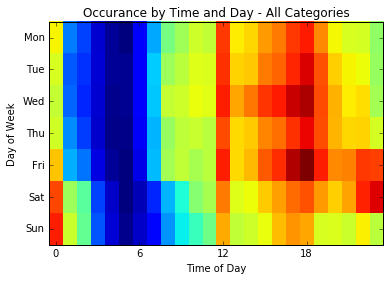

In [25]:
#looking at crimes across all the categories first
plt.figure(1,figsize=(6,4))
plt.hist2d(
    train.Hour.values,
    train.DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]]
)
plt.xticks(np.arange(0,24,6))
plt.xlabel('Time of Day')
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Day of Week')
plt.gca().invert_yaxis()
plt.title('Occurance by Time and Day - All Categories')

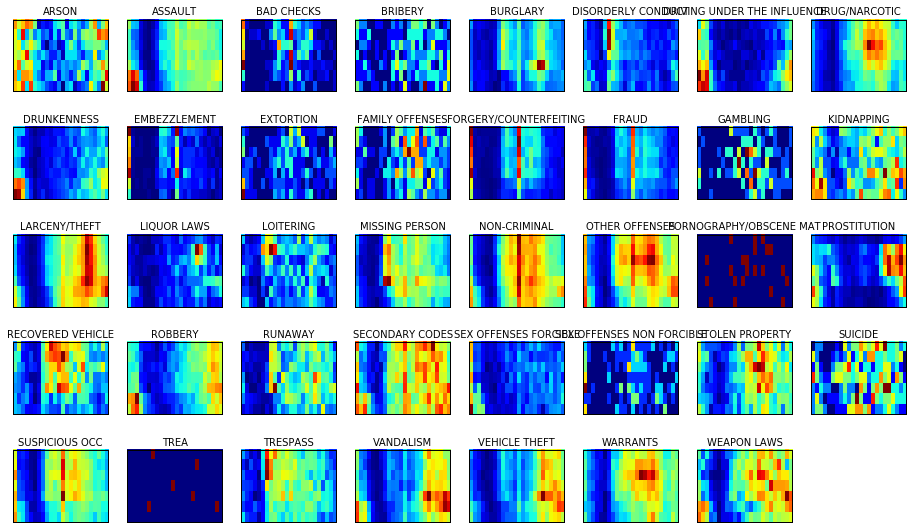

In [27]:
#
# Now look into each category
#

plt.figure(2,figsize=(16,9))
plt.subplots_adjust(hspace=0.5)
for i in np.arange(1,cats.size + 1):
    ax = plt.subplot(5,8,i)
    ax.set_title(cats[i - 1],fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.hist2d(
        train[train.Category==cats[i - 1]].Hour.values,
        train[train.Category==cats[i - 1]].DOW.values, 
        bins=[24,7],
        range=[[-0.5,23.5],[-0.5,6.5]]
    )
    plt.gca().invert_yaxis()

In [28]:
"""white collar crimes look like they're actually only recorded at midnight and noon. this could be an internal/filing factor? Things like narcotics, assault, and maybe robbery should be reliatbly predicted. Suicide and family offenses are gonna be hard to get right"""

"white collar crimes look like they're actually only recorded at midnight and noon. this could be an internal/filing factor? Things like narcotics, assault, and maybe robbery should be reliatbly predicted. Suicide and family offenses are gonna be hard to get right"

In [31]:
"""The following scripts inspired by Wendy Khan on competition Kaggle Scripts page"""
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
train['Year'] = train['Dates'].apply(lambda x:parse_date(x)[1])
train['Week'] = train['Dates'].apply(lambda x: parse_date(x)[2])
train['Hour'] = train.Dates.apply(lambda x: parse_date(x)[3])

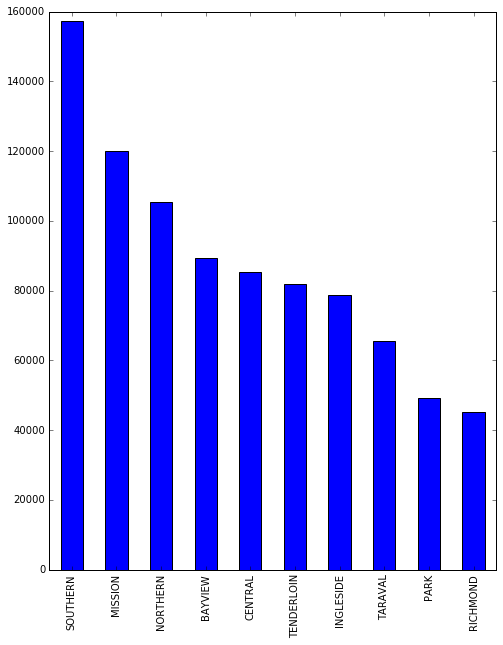

In [33]:
"""district investigation. Where has the most crimes?"""
train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10))
plt.savefig('district_counts.png')

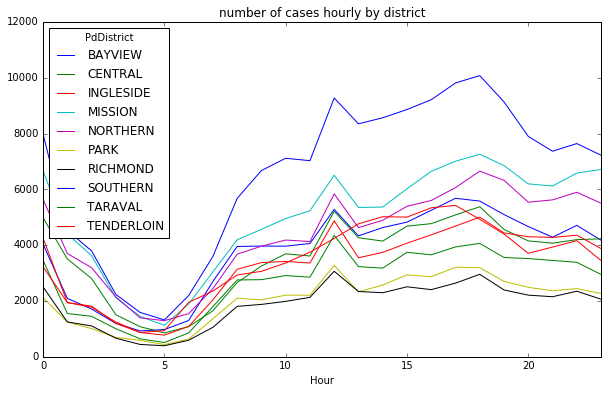

In [39]:
"""Do some districts have generally more crime at special times?"""
hourly_district_events = train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(10,6))
plt.savefig('hourly_events_by_district.png')

In [40]:
"""looks like tenderloin or ingleside don't experience the characteristic hump in crimes, but have a higher overall crime rate. This is probably the tenderloin, knowing the area, because people aren't leaving offices all at once. """

"looks like tenderloin or ingleside don't experience the characteristic hump in crimes, but have a higher overall crime rate. This is probably the tenderloin, knowing the area, because people aren't leaving offices all at once. "

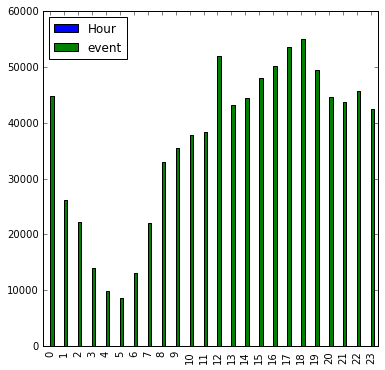

In [37]:
"""In general, crimes seem to fit the same curve by the hour"""
hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6))
plt.savefig('hourly_events.png')
